In [1]:
pip install yfinance pandas numpy matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Function to fetch historical stock data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

[*********************100%%**********************]  1 of 1 completed
Mean Squared Error: 7.354280902809776


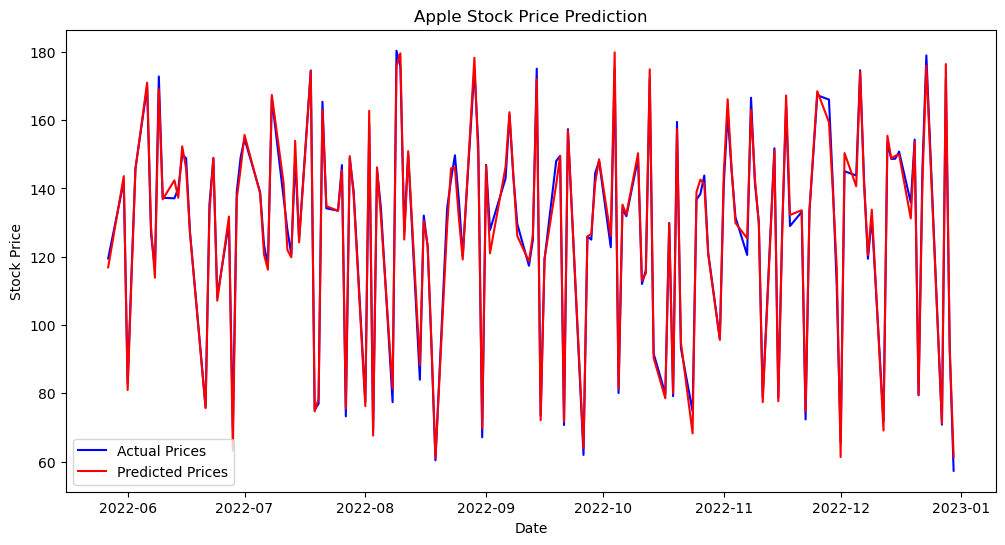

In [4]:
# Function to create features from historical stock data
def create_features(data, window_size):
    X, y = [], []
    for i in range(len(data)-window_size):
        X.append(data[i:(i+window_size)])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Fetch Apple stock data from Yahoo Finance
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-01-01'
apple_stock = get_stock_data(ticker, start_date, end_date)

# Create features (using closing prices)
window_size = 10
X, y = create_features(apple_stock.values, window_size)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(apple_stock.index[-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(apple_stock.index[-len(y_test):], predictions, label='Predicted Prices', color='red')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


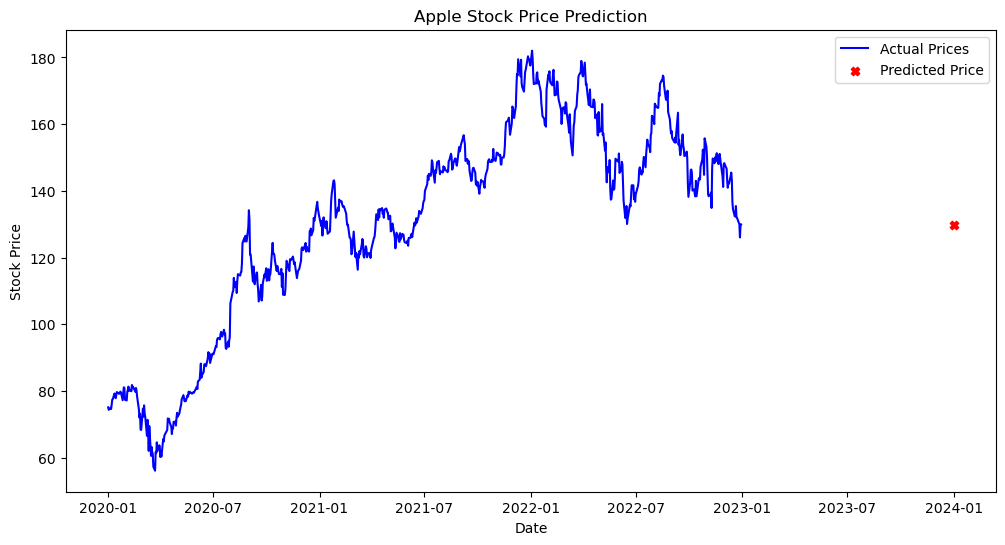

In [5]:
# Create features for the prediction date (2024-01-01)
prediction_date = '2024-01-01'
historical_data_for_prediction = apple_stock.iloc[-window_size:].values.reshape(1, -1)
scaled_data_for_prediction = scaler.transform(historical_data_for_prediction)

# Make predictions for the future date
predicted_price = model.predict(scaled_data_for_prediction)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(apple_stock.index, apple_stock.values, label='Actual Prices', color='blue')
plt.scatter(pd.to_datetime(prediction_date), predicted_price, color='red', marker='X', label='Predicted Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

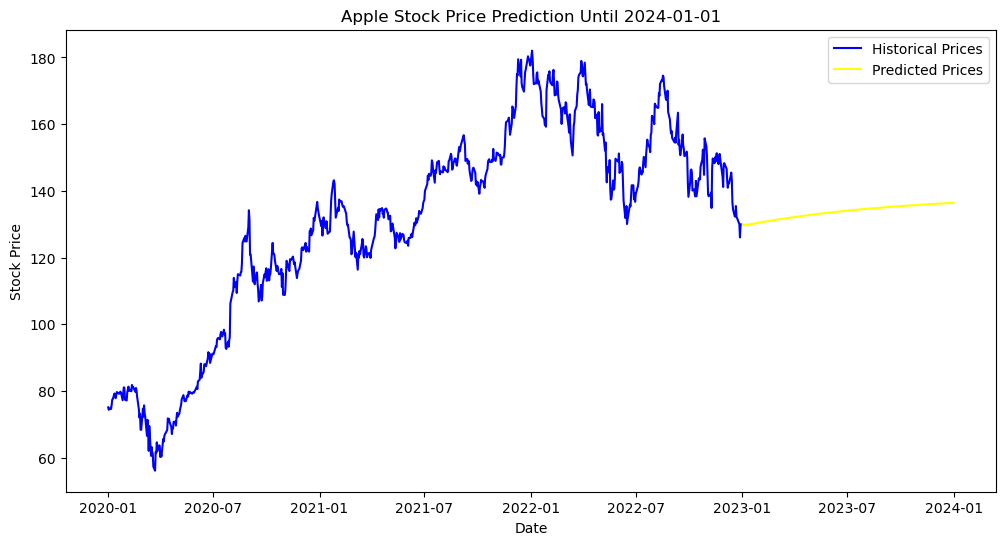

In [7]:
# Create features for future dates up to '2024-01-01'
future_dates = pd.date_range(start='2023-01-02', end='2024-01-01', freq='B')  # Business days
future_features = apple_stock.values[-window_size:].reshape(1, -1)

# Make predictions for future dates
predicted_prices = []

for date in future_dates:
    scaled_data_for_prediction = scaler.transform(future_features)
    predicted_price = model.predict(scaled_data_for_prediction)
    predicted_prices.append(predicted_price[0])

    # Update features for the next prediction
    future_features = np.append(future_features[:, 1:], predicted_price).reshape(1, -1)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(apple_stock.index, apple_stock.values, label='Historical Prices', color='blue')
plt.plot(future_dates, predicted_prices, label='Predicted Prices', color='yellow')
plt.title('Apple Stock Price Prediction Until 2024-01-01')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()